In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2 # comparez vos resultats à une implementation opencv

from skimage import data

matplotlib.rcParams['font.size'] = 18

names = ['astronaut',
          'binary_blobs',
          'camera',
          'checkerboard',
          'chelsea',
          'clock',
          'coffee',
          'coins',
          'horse',
          'logo',
          'page',
          'text',
          'rocket']

images = {}
for name in names:
    caller = getattr(data, name)
    image = caller()
    images[name] = image.copy()


In [2]:
for name in images:
  img = images[name]
  print('name: ', name, ' rank: ', img.ndim, ' shape: ', img.shape, ' dtype: ', img.dtype)

name:  astronaut  rank:  3  shape:  (512, 512, 3)  dtype:  uint8
name:  binary_blobs  rank:  2  shape:  (512, 512)  dtype:  bool
name:  camera  rank:  2  shape:  (512, 512)  dtype:  uint8
name:  checkerboard  rank:  2  shape:  (200, 200)  dtype:  uint8
name:  chelsea  rank:  3  shape:  (300, 451, 3)  dtype:  uint8
name:  clock  rank:  2  shape:  (300, 400)  dtype:  uint8
name:  coffee  rank:  3  shape:  (400, 600, 3)  dtype:  uint8
name:  coins  rank:  2  shape:  (303, 384)  dtype:  uint8
name:  horse  rank:  2  shape:  (328, 400)  dtype:  bool
name:  logo  rank:  3  shape:  (500, 500, 4)  dtype:  uint8
name:  page  rank:  2  shape:  (191, 384)  dtype:  uint8
name:  text  rank:  2  shape:  (172, 448)  dtype:  uint8
name:  rocket  rank:  3  shape:  (427, 640, 3)  dtype:  uint8


In [3]:
def uint8_RGB_to_float32(img):
  return img.astype(np.float32)/255.0

def uint8_GRAY_to_float32(img):
  img = img.astype(np.float32)/255.
  img = np.expand_dims(img, axis=-1)
  # img = np.tile(img, (1, 1, 3))
  return img

def bool_to_float32(img):
  img = img.astype(np.float32)
  img = np.expand_dims(img, axis=-1)
  # img = np.tile(img, (1, 1, 3))
  return img

def float32_to_uint8(img):
	img = 255.*img
	return img.astype(np.uint8)

def to_float32(img):
  if img.dtype == 'uint8':
    if img.ndim == 2:
      return uint8_GRAY_to_float32(img)
    else:
      return uint8_RGB_to_float32(img)
  if img.dtype == 'bool':
    return bool_to_float32(img)

for name in images:
  img = images[name]
  img = to_float32(img)
  images[name] = img
        

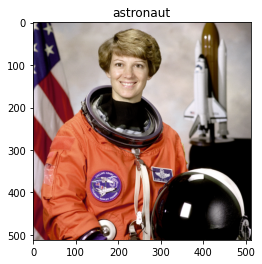

In [4]:
def imshow(img, title=''):
    plt.title(title)
    if image.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    
    plt.show()

imshow(images['astronaut'], 'astronaut')

**Rotation**

In [5]:
img = images['astronaut']
print(np.size(img),np.ndim(img),np.shape(img))

786432 3 (512, 512, 3)


In [6]:
flatimg = images['astronaut'].copy()
flatimg = flatimg.flatten()
print(np.size(flatimg),np.ndim(flatimg),np.shape(flatimg))
print(len(flatimg))

786432 1 (786432,)
786432


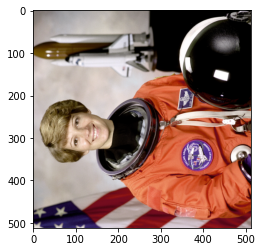

In [7]:
def rotation(img):
  n,m,l = np.shape(img)
  copyImg = img.copy()
  flatimg = copyImg.flatten()
  flatimg = list(flatimg)
  flatrotimg = []
  for j in range(m-1,-1,-1):
    lign = []
    for i in range(n):
      elm = flatimg[l*(m*i+j):l*(m*i+j)+l]
      lign += elm
    flatrotimg += lign
  flatrotimg = np.array(flatrotimg)
  resultimg = flatrotimg.reshape((n, m, l))
  return resultimg

imshow(rotation(images['astronaut']))

**Mise à l'échelle**

In [8]:
def get_value_naive(img, x, y):
  n,m,l = np.shape(img)
  xint = int(x)
  yint = int(y)
  if xint >= 0 and xint < n and yint >= 0 and yint < m:
    return img[xint, yint]
  else:
    return np.array([0,0,0])

def gvn(img, x, y) :
  # Juste pour faciliter l'utilisation
  return get_value_naive(img, x, y)

(32, 32, 3)


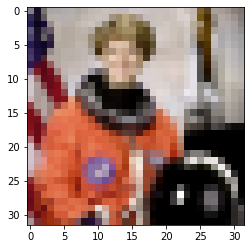

In [9]:
def reduce_resolution(img, k):
  if k == 0:
    return img
  else : 
    n,m,l = np.shape(img)
    result = np.zeros((int(np.ceil(n/2)),int(np.ceil(m/2)),l))
    for i in range(0,n,2):
      for j in range(0, m, 2):
        elm = np.zeros((l,))
        for h in range(l):
          elm[h] = (gvn(img, i,j)[h]+gvn(img,i+1,j)[h]+gvn(img,i,j+1)[h]+ gvn(img,i+1,j+1)[h])/4
        result[i//2, j//2] = elm

    return reduce_resolution(result,k-1)

image = images['astronaut']
redImg = reduce_resolution(image,4)
print(np.shape(redImg))
imshow(redImg)




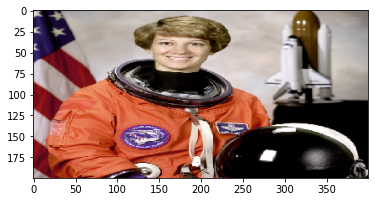

In [10]:
def rescale_naive(img, w_new, h_new):
  h, w , l = np.shape(img)
  resc_img = np.zeros((h_new, w_new, l))
  for i in range(h_new):
    for j in range(w_new):
      resc_img [i,j] = get_value_naive(img, i*h/h_new, j*w/w_new)
  return resc_img

imshow(rescale_naive(image, 400, 200))

**Rotation naive**

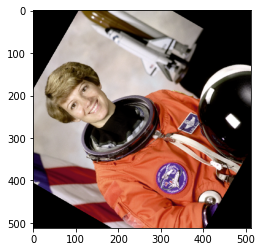

In [11]:
image = images['astronaut']
def rotate_naive(img, theta):
  h, w, l = np.shape(img)
  grid = np.zeros((h, w, l))
  for i in range(h):
    for j in range(w):
      grid[i,j] = get_value_naive(img, (i-h//2)*np.cos(theta)+h//2 + (j-w//2)*np.sin(theta),  (j-w//2)*np.cos(theta)+w//2 - (i-h//2)*np.sin(theta))
  return grid

imshow(rotate_naive(image, np.pi/3))

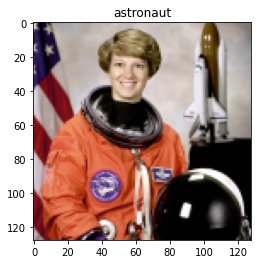

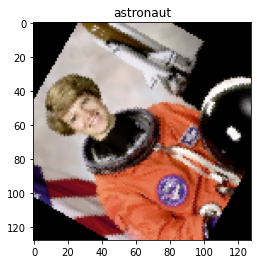

In [12]:
image = images['astronaut']
image = reduce_resolution(image, 2)
imshow(image, 'astronaut')
image = rotate_naive(image, np.pi / 3.)
imshow(image, 'astronaut')

In [13]:
def bilinear_interp(img, x, y):
  n,m,l = np.shape(img)
  x1 = np.floor(x)
  x2 = np.ceil(x)
  y1 = np.floor(y)
  y2 = np.ceil(y)
  dx = x-x1
  dy = y-y1
  
  deltafx = get_value_naive(img,x2,y1) - get_value_naive(img,x1, y1)
  deltafxy = get_value_naive(img,x1,y1) + get_value_naive(img,x2, y2)-get_value_naive(img,x2, y1) - get_value_naive(img,x1, y2)
  deltafy = get_value_naive(img,x1,y2) - get_value_naive(img,x1, y1)
  return deltafx*dx + deltafy*dy +deltafxy*dx*dy + get_value_naive(img, x1,y1)



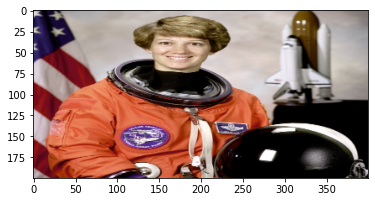

In [14]:
def rescale(img, w_new, h_new):
  h, w , l = np.shape(img)
  resc_img = np.zeros((h_new, w_new, l))
  for i in range(h_new):
    for j in range(w_new):
      resc_img [i,j] = bilinear_interp(img, i*h/h_new, j*w/w_new)
  return resc_img
image = images['astronaut']
imshow(rescale(image, 400, 200))

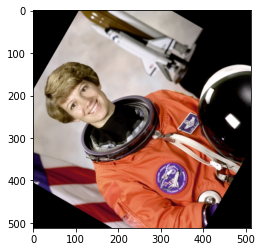

In [15]:
def rotate(img, theta):
  h, w, l = np.shape(img)
  grid = np.zeros((h, w, l))
  for i in range(h):
    for j in range(w):
      grid[i,j] = bilinear_interp(img, (i-h//2)*np.cos(theta)+h//2 + (j-w//2)*np.sin(theta),  (j-w//2)*np.cos(theta)+w//2 - (i-h//2)*np.sin(theta))
  return grid

imshow(rotate(image, np.pi/3))

##**Les bases du filtrage**

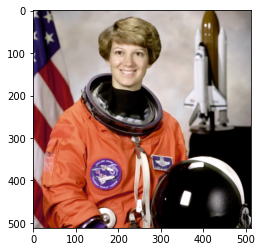

In [16]:
def median(L):
  # L un numpy array
  n = len(L)
  L.sort()
  return L[n//2]
  


def median_filterr(img, n):
  h, w, l = np.shape(img)
  filteredImg = np.array(img, copy = True)
  filteredImg = np.pad(filteredImg, [(n, n),(n, n),(0,0)], 'edge')
  for i in range(n//2-1, h-n//2+1):
    for j in range(n//2-1, w-n//2+1):
      S = []
      for h in range(-n//2+1,n//2+1):
        for k in range(-n//2+1,n//2+1):
          S.append(img[h,k])
      for t in range(l):
        St = [S[u][t] for u in range(len(S))]
        St= np.array(St)
        filteredImg[i, j, t] = median(St)
  return filteredImg

def median_filter(img, n):
  h, w, l = np.shape(img)

  #filteredImg = np.array(img, copy = True)
  filteredImg = np.zeros((h, w, l))
  paddedImg = np.pad(img, [(n, n),(n, n),(0,0)], 'edge')
  for i in range(h):
    for j in range(w):
      S = []
      for r in range(-n//2+1+i,n//2+1+i):
        for k in range(-n//2+1+j,n//2+1+j):
          S.append(get_value_naive(img, r, k))
      # S est la liste des pixels dans la fenêtre considérée    
      for t in range(l):
        # pour chaque canal t
        St = [p[t] for p in S]
        filteredImg[i, j, t] = median(St)
      
  return filteredImg



image  = images['astronaut']
imshow(median_filter(image, 3))

      







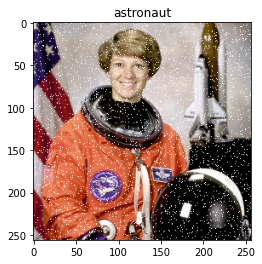

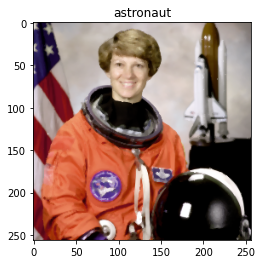

In [17]:
def salt_noise(img, t):
    img = img.copy()
    w = img.shape[0]
    h = img.shape[1]
    for i in range(w):
        for j in range(h):
            r = np.random.rand()
            if r > t:
                img[i, j, :] = 1.
    return img

image = images['astronaut']
image = reduce_resolution(image, 1)
image = salt_noise(image, 0.95)
imshow(image, 'astronaut')
image = median_filter(image, 3)
imshow(image, 'astronaut')

**Flou Gaussien**

In [18]:
def convolution(img, w):
  n, m, _ = np.shape(img)
  l = len(w)
  paddedImg = np.pad(img, [(l,l),(l,l),(0,0)], 'edge' )
  convImg = np.zeros((n,m,1))
  for i in range(n):
    for j in range(m):
      S = 0
      for u in range(l):
        for v in range(l):
          S += w[u,v] * paddedImg[i+u+l,j+v+l]
      convImg[i,j] = np.array(S)
  return convImg




In [19]:
W_gauss = (1./273.)*np.array([[1., 4. , 7. , 4. , 1.],
           [4., 16., 26., 16., 4.],
           [7., 26., 41., 26., 7.],
           [4., 16., 26., 16., 4.],
           [1., 4. , 7. , 4. , 1.]])
def gaussian_blur(img):
  return convolution(img, W_gauss)
  

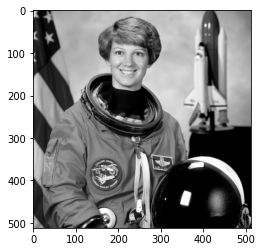

In [20]:
def greyImg(img):
  # img une image RGB
  h, w, l= np.shape(img)
  greyImg = np.zeros((h,w,1))
  for i in range(h):
    for j in range(w):
      greyImg[i, j] = np.array(0.21*img[i,j,0]+ 0.72*img[i,j,1] + 0.07*img[i, j, 2])

  return greyImg
image = images['astronaut']
grey = greyImg(image)
imshow(grey)

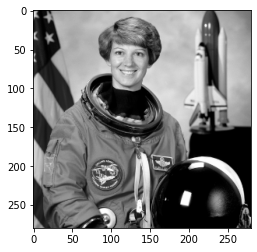

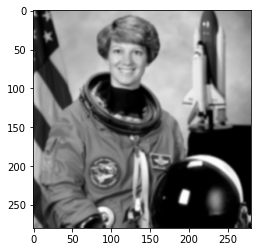

In [21]:
image = greyImg(images['astronaut'])
image = rescale(image, 280, 280)
imshow(image)
imshow(gaussian_blur(image))


In [22]:
C = np.array([[0.006, 0.061, 0.242, 0.383, 0.242, 0.061, 0.006]])
C = np.zeros((1,5))
for i in range(5):
  C[0][i] = np.sqrt(W_gauss[i,i])

print(np.matmul(C.T, C))
print(W_gauss)


[[0.003663   0.01465201 0.02345467 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.09381867 0.05860806 0.01465201]
 [0.02345467 0.09381867 0.15018315 0.09381867 0.02345467]
 [0.01465201 0.05860806 0.09381867 0.05860806 0.01465201]
 [0.003663   0.01465201 0.02345467 0.01465201 0.003663  ]]
[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


In [23]:
def motion_blur45(img, n):
  W = np.zeros((n,n))
  for i in range(n):
    W[i,i] = 1/n
  return convolution(img, W)
     

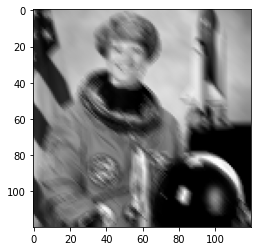

In [24]:
image = images['astronaut']
image = greyImg(rescale(image, 120, 120))
imshow(motion_blur45(image, 4))

**Détection des contours** 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


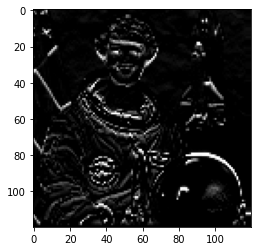

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


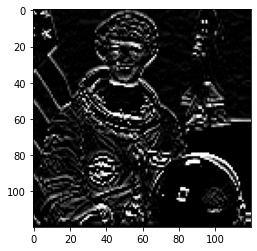

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


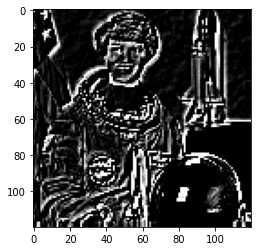

In [25]:
w1 = np.array([[0,  0, -1,  0,  0],
               [0,  0, -1,  0,  0],
               [0,  0,  2,  0,  0],
               [0,  0,  0,  0,  0],
               [0,  0,  0,  0,  0]])
w2= np.array([[0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0,  4,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0]])
w3 = np.array([[-1,  0,  0,  0,  0],
               [ 0, -2,  0,  0,  0],
               [ 0,  0,  6,  0,  0],
               [ 0,  0,  0, -2,  0],
               [ 0,  0,  0,  0, -1]])
imshow(convolution(image, w1 ))
imshow(convolution(image, w2 ))
imshow(convolution(image, w3 ))

In [26]:
wx = np.array([[-1, 0, 1], 
			  [-2, 0, 2], 
			  [-1, 0, 1]], np.float32) 
wy = np.array([[ 1,  2, 1], 
			  [ 0,  0, 0], 
			  [-1, -2, -1]], np.float32)
def grad_x(img):
  return convolution(img, wx)

def grad_y(img):
  return convolution(img, wy)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


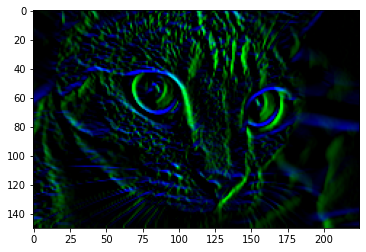

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


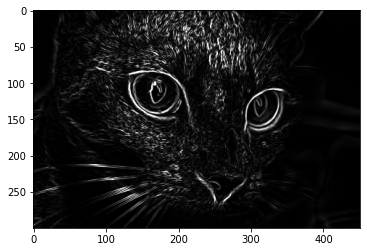

In [27]:
def vis_grad(img, s):
  # image est un tenseur de rang 2 
  n, m, _ = np.shape(img)
  img_copy = rescale(img,m//s, n//s)
  grad_img = np.zeros((n//s, m//s, 3))
  gradx_img = grad_x(img_copy)
  grady_img = grad_y(img_copy)
  grad_img[:,:,1] = gradx_img[:,:,0]
  grad_img[:,:,2] = grady_img[:,:, 0]
  return grad_img

#imshow(vis_grad(image,1))
image2 = images['chelsea']
image2 = greyImg(image2)
imshow(vis_grad(image2,2))
imshow(grad_x(image2)**2 + grad_y(image2)**2)

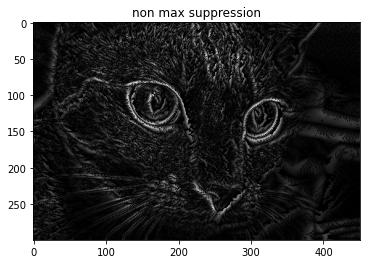

In [28]:
def non_max_suppression(I, D):
  n, m, l = np.shape(I)
  img = np.zeros((n, m, l))
  for i in range(1,n-1):
    for j in range(1,m-1):
      if D[i,j] <= -np.pi/4 and D[i,j]>-3*np.pi/4:
        if I[i,j]<= I[i-1,j]:
          I[i,j] = 0
      elif D[i,j] <= np.pi/4 and D[i,j] > np.pi/4:
        if I[i,j]<= I[i,j+1]:
          I[i,j] = 0
      elif D[i,j] <= 3*np.pi/4 and D[i,j] > np.pi/4:
        if I[i,j]<= I[i+1,j]:
          I[i,j] = 0
      else:
        if I[i,j]<= I[i,j-1]:
          I[i,j] = 0
  return I

def polar_gradient(img):
  # On considère que image est déjà en niveaux de gris, et que le filtre gaussien est appliqué
  n, m, l = np.shape(img)
  gx = grad_x(img)
  gy = grad_y(img)
  I = np.sqrt(gx**2 + gy**2)
  maxi = np.max(I)
  I = I/maxi
  D = np.arctan2(gx, gy)
  return (I, D)



image2 = images['chelsea']
image2 = greyImg(image2)
image2 = gaussian_blur(image2)
I, D = polar_gradient(image2)
nms = non_max_suppression(I, D)
imshow(nms, "non max suppression")

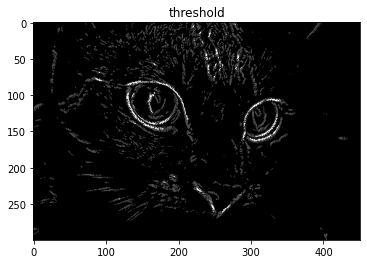

In [29]:
def threshold(img, low, high):
  n, m, l = np.shape(img)
  thImg = np.zeros((n, m, l))
  for i in range(n):
    for j in range(m):
      if img[i,j,0] > high:
        thImg [i, j,0] = 1
      elif img[i, j,0]>= low:
        thImg [i, j,0] = 0.3
  return thImg


ths = threshold(nms, 0.25, 0.6)
imshow(ths, "threshold")



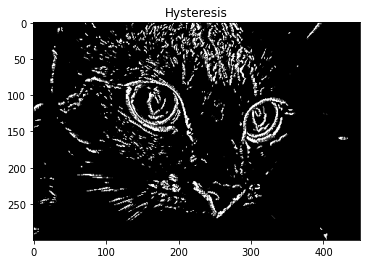

In [30]:
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

def hysteresis(img, weak=0.3):
  n, m, l = np.shape(img)
  hysImg = np.array(img, copy=True)
  for i in range(1, n-1):
    for j in range(1, m-1):
      if isclose(img[i, j], 0.3):
        if img[i-1, j] or img[i+1, j] or img[i, j+1] or img[i, j-1]:
          hysImg[i, j] = 1
  return hysImg

hys = hysteresis(ths)
imshow(hys, "Hysteresis")

In [31]:
def canny_edge_detection(img, low, high):
  cannImg = greyImg(img)
  cannImg = gaussian_blur(cannImg)
  I, D = polar_gradient(cannImg)
  nms = non_max_suppression(I, D)
  cannImg = threshold(nms, low, high)
  cannImg = hysteresis(cannImg)
  return cannImg

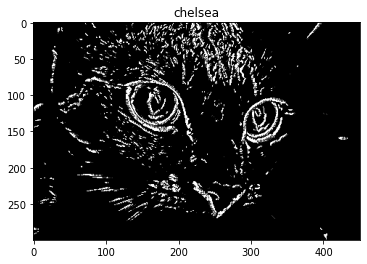

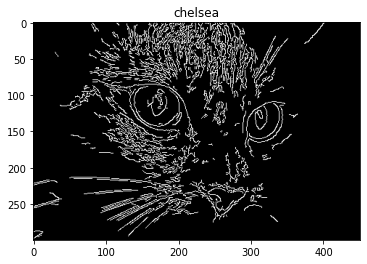

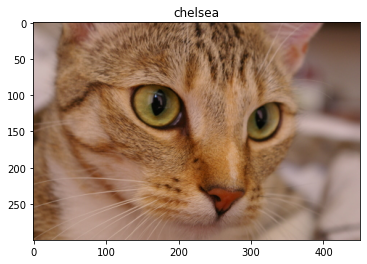

In [32]:
image_original = images['chelsea']
#reduced = reduce_resolution(image_original, 1)
reduced = image_original
canny1 = canny_edge_detection(reduced, 0.25, 0.6)
canny2 = 255.*reduced
canny2 = canny2.astype('uint8')
canny2 = cv2.Canny(canny2, 100, 200)
#canny2 = bool_to_float32(canny2)
#canny2 = canny2.reshape((150, 226, 1))
canny2 = canny2.reshape((300, 451, 1))


imshow(canny1, 'chelsea')
imshow(canny2, 'chelsea')
imshow(images['chelsea'], 'chelsea')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


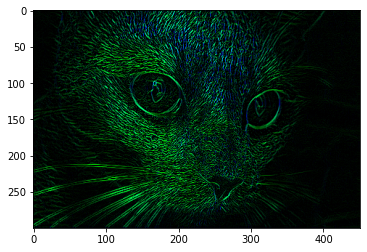

In [34]:
w2x = np.array([[0, 0, 0], 
			  [1, -2, 1], 
			  [0, 0, 0]], np.float32) 

wxy = np.array([[1, 0, -1], 
			  [0, 0, 0], 
			  [-1, 0, 1]], np.float32)
		
w2y = np.array([[0, 1, 0], 
		    [0, -2, 0], 
			  [0, 1, 0]], np.float32)
def vis_hessian(img):
  n, m, l = np.shape(img)
  #H = np.zeros(n, m, 2, 2)
  #V = np.zeros(n, m, 2)
  #S = np.zeros(n, m, 1)
  V_h = np.zeros((n, m, 3))
  d2fx2 = convolution(img, w2x) 
  d2fxfy = convolution(img, wxy)
  d2fy2 = convolution(img, w2y)
  for i in range(n):
    for j in range(m):
      H = np.array([[d2fx2[i,j,0], d2fxfy[i,j,0]],
                         [d2fxfy[i,j,0], d2fy2[i, j,0]]])
      #H[i,j] = A
      v1 = np.linalg.eigh(H)[0][0]  # Première valeur propre
      v2 = np.linalg.eigh(H)[0][1] # Deuxième valeur propre
      VP = np.linalg.eigh(H)[1][0] if np.abs(v1) > np.abs(v2) else np.linalg.eigh(H)[1][1]
      a = v1 if np.abs(v1) > np.abs(v2) else v2

      #V[i,j] = L
      s = np.abs(VP[1])
      V_h [i, j] = np.array([0, a*s, a*(1-s)])
  
  return V_h
f = lambda x : 5*x
imshow(f(vis_hessian(greyImg(images["chelsea"]))))

#np.shape(greyImg(images["chelsea"]))
#np.shape(vis_hessian(images["chelsea"]))


